<a href="https://colab.research.google.com/github/knightrid/grab_packt/blob/master/01-intro-and-data-sources/%5B2025%5D_Module_01_Colab_Introduction_and_Data_Sources.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0) Imports

In [1]:
# install the main library YFinance
!pip install yfinance

In [2]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date


# 1) Understanding Data-Driven Decisions data pulls

In [ ]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

## 1.1) GDP

In [ ]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPPOT
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)

In [ ]:
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(1)-1
gdppot.tail(15)

In [ ]:
# Visuals GDPPOT
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
ax.fill_between(gdppot.index, gdppot.GDPPOT, color="red", alpha=0.3, label="US Potential GDP")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdppot.gdppot_us_yoy, color="blue", marker="o", label="US Potential GDP Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Potential GDP, $b", color="red", fontsize=14)
ax2.set_ylabel("US Potential GDP Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## 1.2) Inflation - CPI Core

In [ ]:
# # "Core CPI index", MONTHLY
# https://fred.stlouisfed.org/series/CPILFESL
# The "Consumer Price Index for All Urban Consumers: All Items Less Food & Energy"
# is an aggregate of prices paid by urban consumers for a typical basket of goods, excluding food and energy.
# This measurement, known as "Core CPI," is widely used by economists because food and energy have very volatile prices.
cpilfesl = pdr.DataReader("CPILFESL", "fred", start=start)

In [ ]:
cpilfesl['cpi_core_yoy'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(12)-1
cpilfesl['cpi_core_mom'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(1)-1

cpilfesl.tail(13)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(cpilfesl.index, cpilfesl.CPILFESL, color="red", alpha=0.3, label="Core CPI index (monthly)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(cpilfesl.cpi_core_yoy, color="blue", marker="o", label="Core CPI index (monthly) Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Core CPI index (monthly)", color="red", fontsize=14)
ax2.set_ylabel("Core CPI index Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## 1.3 Interest rates

In [ ]:
# Fed rate https://fred.stlouisfed.org/series/FEDFUNDS
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.tail(10)

In [ ]:
# Fed Funds
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
# ax.fill_between(fedfunds.index, fedfunds.FEDFUNDS, color="red", alpha=0.3, label="Core CPI index (monthly)")

# # Creating a secondary y-axis for GDP growth percentage
# ax2 = ax.twinx()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.plot(fedfunds.index, fedfunds.FEDFUNDS/100, marker="o", label="Fed Funds Rate")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Fed Funds Rate", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()

In [ ]:
# https://fred.stlouisfed.org/series/DGS1
dgs1 = pdr.DataReader("DGS1", "fred", start=start)
dgs1.tail()

Other rates for US Treasury: https://fred.stlouisfed.org/categories/115  
* https://fred.stlouisfed.org/series/DGS2
* https://fred.stlouisfed.org/series/DGS3
* https://fred.stlouisfed.org/series/DGS5
* https://fred.stlouisfed.org/series/DGS10
...

In [ ]:
# https://fred.stlouisfed.org/series/DGS5
dgs5 = pdr.DataReader("DGS5", "fred", start=start)
dgs5.tail()

## 1.4 SNP500

In [ ]:
# Other indexes: https://stooq.com/t/

# SPX= S&P500
spx_index = pdr.get_data_stooq('^SPX', start, end)
spx_index.head()

In [ ]:
# 252 trading days a year
  # REVERSE ORDER OF THE DATA!!!
spx_index['spx_dod'] = (spx_index.Close/spx_index.Close.shift(-1)-1)
spx_index['spx_qoq'] = (spx_index.Close/spx_index.Close.shift(-63)-1)
spx_index['spx_yoy'] = (spx_index.Close/spx_index.Close.shift(-252)-1)

In [ ]:
spx_index.head()

In [ ]:
spx_truncated = spx_index[spx_index.index>='1990-01-01']

In [ ]:
# S&P500 abs. vs. relative growth
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(spx_truncated.index, spx_truncated.Close, color="red", alpha=0.3, label="S&P 500 Absolute Value (Close price)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(spx_truncated.spx_yoy,
         color="blue",
        #  marker=".",
         label="Year-over-Year Growth (%)")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("S&P 500 Absolute Value (Close price", color="red", fontsize=14)
ax2.set_ylabel("Year-over-Year Growth (%)", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

# 2) Data Sources for Stocks

## 2.1 OHLCV data daily - INDEXES

In [19]:
# INDEXES from Yahoo Finance
# DAX index (XETRA - XETRA Delayed Price. Currency in EUR)
# WEB: https://finance.yahoo.com/quote/%5EGDAXI
# Option 1: dax_daily = yf.download(tickers = ["^GDAXI"],
#                      period = "max",
#                      interval = "1d")

# Option 2 (preferred):
# Download data with Adj Close for more accurate price reflections
ticker_obj = yf.Ticker("^GDAXI")
dax_daily = ticker_obj.history(start = start)

In [20]:
dax_daily.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-07-07 00:00:00+02:00,23845.880859,24073.669922,23836.580078,24073.669922,39606000,0.0,0.0
2025-07-08 00:00:00+02:00,24135.740234,24244.089844,24063.419922,24206.910156,60796000,0.0,0.0
2025-07-09 00:00:00+02:00,24278.890625,24609.150391,24261.009766,24549.560547,60620400,0.0,0.0
2025-07-10 00:00:00+02:00,24638.580078,24639.099609,24450.970703,24456.810547,58767400,0.0,0.0
2025-07-11 00:00:00+02:00,24333.109375,24369.050781,24166.630859,24255.310547,45562600,0.0,0.0


In [21]:
# normally 252 trading days
dax_daily['adj_close_last_year'] = dax_daily['Close'].shift(252)
dax_daily['yoy_growth'] = dax_daily['Close'] / dax_daily['adj_close_last_year'] -1

In [22]:
dax_daily

,Open,High,Low,Close,Volume,Dividends,Stock Splits,adj_close_last_year,yoy_growth
Date,,,,,,,,,
1987-12-30 00:00:00+01:00,1005.190002,1005.190002,1005.190002,1005.190002,0,0.0,0.0,NaN,NaN
1988-01-04 00:00:00+01:00,956.489990,956.489990,956.489990,956.489990,0,0.0,0.0,NaN,NaN
1988-01-05 00:00:00+01:00,996.099976,996.099976,996.099976,996.099976,0,0.0,0.0,NaN,NaN
1988-01-06 00:00:00+01:00,1006.010010,1006.010010,1006.010010,1006.010010,0,0.0,0.0,NaN,NaN
1988-01-07 00:00:00+01:00,1014.469971,1014.469971,1014.469971,1014.469971,0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-07-07 00:00:00+02:00,23845.880859,24073.669922,23836.580078,24073.669922,39606000,0.0,0.0,18472.050781,0.303248
2025-07-08 00:00:00+02:00,24135.740234,24244.089844,24063.419922,24206.910156,60796000,0.0,0.0,18236.189453,0.327411
2025-07-09 00:00:00+02:00,24278.890625,24609.150391,24261.009766,24549.560547,60620400,0.0,0.0,18407.220703,0.333692


<Axes: xlabel='Date'>

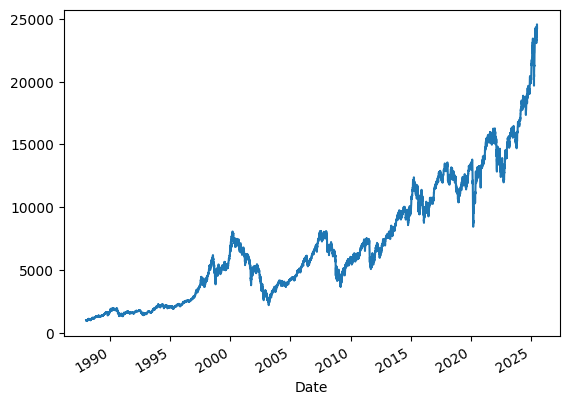

In [23]:
dax_daily['Close'].plot.line()

In [24]:
# delayed 15 min : https://finance.yahoo.com/quote/%5ESPX/
# S&P 500 INDEX : Chicago Options - Chicago Options Delayed Price. Currency in USD
ticker_obj = yf.Ticker("^SPX")
snp500_daily = ticker_obj.history(start = start, interval = "1d")

# old version:
# snp500_daily = yf.download(tickers = "^SPX",
#                      period = "max",
#                      interval = "1d")

In [25]:
snp500_daily.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-07-07 00:00:00-04:00,6259.040039,6262.069824,6201.000000,6229.979980,5236740000,0.0,0.0
2025-07-08 00:00:00-04:00,6234.029785,6242.700195,6217.750000,6225.520020,5739030000,0.0,0.0
2025-07-09 00:00:00-04:00,6243.330078,6269.160156,6231.430176,6263.259766,4813340000,0.0,0.0
2025-07-10 00:00:00-04:00,6266.799805,6290.220215,6251.439941,6280.459961,5367350000,0.0,0.0
2025-07-11 00:00:00-04:00,6255.680176,6269.439941,6237.600098,6259.750000,4656210000,0.0,0.0


In [26]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
# https://www.investopedia.com/insights/introduction-to-stock-market-indices/

ticker_obj = yf.Ticker("^GSPC")
snp500_daily_non_delayed = ticker_obj.history(start = start, interval = "1d")

# old version:
# snp500_daily_non_delayed = yf.download(tickers = "^GSPC",
#                      period = "max",
#                      interval = "1d")

In [27]:
snp500_daily_non_delayed.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-07-07 00:00:00-04:00,6259.040039,6262.069824,6201.000000,6229.979980,5236740000,0.0,0.0
2025-07-08 00:00:00-04:00,6234.029785,6242.700195,6217.750000,6225.520020,5739030000,0.0,0.0
2025-07-09 00:00:00-04:00,6243.330078,6269.160156,6231.430176,6263.259766,4813340000,0.0,0.0
2025-07-10 00:00:00-04:00,6266.799805,6290.220215,6251.439941,6280.459961,5367350000,0.0,0.0
2025-07-11 00:00:00-04:00,6255.680176,6269.439941,6237.600098,6259.750000,4656210000,0.0,0.0


In [28]:
# Dow Jones Industrial Average: https://finance.yahoo.com/quote/%5EDJI?.tsrc=fin-srch

ticker_obj = yf.Ticker("^DJI")
dji_daily = ticker_obj.history(start = start, interval = "1d")

# dji_daily = yf.download(tickers = "^DJI",
#                      period = "max",
#                      interval = "1d")

## 2.2 OHLCV data daily - ETFs

In [29]:
# https://finance.yahoo.com/quote/VOO?.tsrc=fin-srch

ticker_obj = yf.Ticker("VOO")
voo_etf = ticker_obj.history(start = start, interval = "1d")

# voo_etf = yf.download(tickers = "VOO",
#                      period = "max",
#                      interval = "1d")


In [30]:
voo_etf.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2025-07-07 00:00:00-04:00,573.000000,573.590027,567.979980,570.609985,6417800,0.0,0.0,0.0
2025-07-08 00:00:00-04:00,571.150024,571.830017,569.479980,570.229980,6944600,0.0,0.0,0.0
2025-07-09 00:00:00-04:00,572.460022,574.260010,570.760010,573.609985,7156500,0.0,0.0,0.0
2025-07-10 00:00:00-04:00,573.780029,576.260010,572.700012,575.289978,4961700,0.0,0.0,0.0
2025-07-11 00:00:00-04:00,572.450012,574.380005,571.369995,573.219971,4425200,0.0,0.0,0.0


In [31]:
# ETFs
# WisdomTree India Earnings Fund (EPI)
# NYSEArca - Nasdaq Real Time Price. Currency in USD
# WEB: https://finance.yahoo.com/quote/EPI/history?p=EPI

ticker_obj = yf.Ticker("EPI")
epi_etf_daily = ticker_obj.history(start = start, interval = "1d")

# epi_etf_daily = yf.download(tickers = "EPI",
#                      period = "max",
#                      interval = "1d")

In [32]:
epi_etf_daily.head()
print(epi_etf_daily.shape)

(4372, 8)


In [33]:
# find dividends impact on Close vs. Adj.Close
epi_etf_daily[epi_etf_daily.Dividends>0].tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2021-12-27 00:00:00-05:00,33.577707,33.801809,33.577707,33.764458,379100,0.192,0.0,0.0
2022-03-25 00:00:00-04:00,33.563275,33.666313,33.432129,33.666313,584400,0.115,0.0,0.0
2022-06-24 00:00:00-04:00,29.420327,29.778748,29.370547,29.768791,387900,1.845,0.0,0.0
2023-06-26 00:00:00-04:00,34.020314,34.070182,33.960471,33.990395,634600,0.060,0.0,0.0
2024-12-26 00:00:00-05:00,45.840000,45.840000,45.700001,45.820000,685600,0.121,0.0,0.0


In [34]:
epi_etf_daily[(epi_etf_daily.index >='2024-12-23') & (epi_etf_daily.index <='2024-12-28')]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-12-23 00:00:00-05:00,45.609761,45.879052,45.609761,45.869080,630400,0.000,0.0,0.0
2024-12-24 00:00:00-05:00,45.719475,45.928922,45.709503,45.899002,277100,0.000,0.0,0.0
2024-12-26 00:00:00-05:00,45.840000,45.840000,45.700001,45.820000,685600,0.121,0.0,0.0
2024-12-27 00:00:00-05:00,45.570000,45.650002,45.500000,45.639999,774900,0.000,0.0,0.0


In [35]:
# find dividends - diff for Close vs. Adj Close
# Open/Close for 06-25 diff is close to divs = 1.845 (~1.58 for Open and 1.3 for Close)
# HELP: https://help.yahoo.com/kb/SLN28256.html#:~:text=Adjusted%20close%20is%20the%20closing,Security%20Prices%20(CRSP)%20standards.
epi_etf_daily[(epi_etf_daily.index >='2024-12-23') & (epi_etf_daily.index <='2024-12-28')]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-12-23 00:00:00-05:00,45.609761,45.879052,45.609761,45.869080,630400,0.000,0.0,0.0
2024-12-24 00:00:00-05:00,45.719475,45.928922,45.709503,45.899002,277100,0.000,0.0,0.0
2024-12-26 00:00:00-05:00,45.840000,45.840000,45.700001,45.820000,685600,0.121,0.0,0.0
2024-12-27 00:00:00-05:00,45.570000,45.650002,45.500000,45.639999,774900,0.000,0.0,0.0


In [36]:
# Previous option : no Div. dates , same stats
epi_etf_daily2 = yf.download(tickers = "EPI",
                     period = "max",
                     interval = "1d")

/tmp/ipython-input-36-3463259538.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  epi_etf_daily2 = yf.download(tickers = "EPI",
[*********************100%***********************]  1 of 1 completed


In [37]:
epi_etf_daily2[epi_etf_daily2.index>='2024-12-23'].head()

Price,Close,High,Low,Open,Volume
Ticker,EPI,EPI,EPI,EPI,EPI
Date,,,,,
2024-12-23,45.869080,45.879052,45.609761,45.609761,630400
2024-12-24,45.899002,45.928922,45.709503,45.719475,277100
2024-12-26,45.820000,45.840000,45.700001,45.840000,685600
2024-12-27,45.639999,45.650002,45.500000,45.570000,774900
2024-12-30,45.090000,45.180000,44.980000,45.180000,1442100


<Axes: title={'center': "EPI's etf stock price"}, xlabel='Date'>

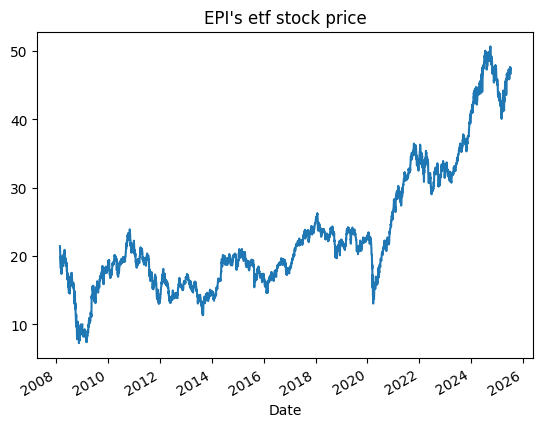

In [38]:
# About yFinance: https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html

epi_etf_daily['Close'].plot(title="EPI's etf stock price")

In [39]:
# get actions, incl. dividends - as a dataFrame
epi = yf.Ticker('EPI')
epi.get_actions()

,Dividends,Stock Splits,Capital Gains
Date,,,
2008-12-22 00:00:00-05:00,0.091,0.0,0.0
2009-03-23 00:00:00-04:00,0.007,0.0,0.0
2009-06-22 00:00:00-04:00,0.002,0.0,0.0
2009-09-21 00:00:00-04:00,0.045,0.0,0.0
2009-12-21 00:00:00-05:00,0.006,0.0,0.0
2010-06-28 00:00:00-04:00,0.065,0.0,0.0
2010-09-20 00:00:00-04:00,0.065,0.0,0.0
2010-12-22 00:00:00-05:00,0.013,0.0,0.0
2011-06-22 00:00:00-04:00,0.062,0.0,0.0


In [40]:
# get dividends as Series
epi.get_dividends()

,Dividends
Date,
2008-12-22 00:00:00-05:00,0.091
2009-03-23 00:00:00-04:00,0.007
2009-06-22 00:00:00-04:00,0.002
2009-09-21 00:00:00-04:00,0.045
2009-12-21 00:00:00-05:00,0.006
2010-06-28 00:00:00-04:00,0.065
2010-09-20 00:00:00-04:00,0.065
2010-12-22 00:00:00-05:00,0.013
2011-06-22 00:00:00-04:00,0.062


In [41]:
# India's stock example
# https://www.nseindia.com/market-data/live-equity-market
EICHERMOT = yf.download(tickers = "EICHERMOT.NS",
                     period = "max",
                     interval = "1d")

/tmp/ipython-input-41-1576332518.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  EICHERMOT = yf.download(tickers = "EICHERMOT.NS",
[*********************100%***********************]  1 of 1 completed


In [42]:
EICHERMOT

Price,Close,High,Low,Open,Volume
Ticker,EICHERMOT.NS,EICHERMOT.NS,EICHERMOT.NS,EICHERMOT.NS,EICHERMOT.NS
Date,,,,,
1996-01-01,1.255640,1.255640,1.255640,1.255640,22000
1996-01-02,1.259127,1.269591,1.255640,1.255640,31000
1996-01-03,1.273079,1.273079,1.273079,1.273079,11000
1996-01-04,1.273079,1.273079,1.255640,1.255640,16000
1996-01-05,1.255640,1.273079,1.234713,1.273079,6000
...,...,...,...,...,...
2025-07-07,5682.500000,5700.000000,5625.000000,5630.000000,227078
2025-07-08,5679.500000,5705.000000,5648.500000,5705.000000,180630


## 2.3 Paid data - Poligon.io (news endpoint) and Alpha Vantage

In [43]:
# [Polygon.io] Please read the article (section "Polygon.io News API"): https://pythoninvest.com/long-read/chatgpt-api-for-financial-news-summarization
# Endpoint: https://polygon.io/docs/stocks/get_v2_reference_news

In [44]:
# [Alpha Vantage] Please read the article (section "Data Sources"): https://pythoninvest.com/long-read/stock-screening-using-paid-data
# Endpoint: https://www.alphavantage.co/documentation/#fundamentals

## 2.4 Macroeconomics

* some indicator examples: gold reserves vs. volatility

In [45]:
# Gold reserves excl. gold for China
# https://fred.stlouisfed.org/series/TRESEGCNM052N

In [46]:
gold_reserves = pdr.DataReader("TRESEGCNM052N", "fred", start=start)

<Axes: xlabel='DATE'>

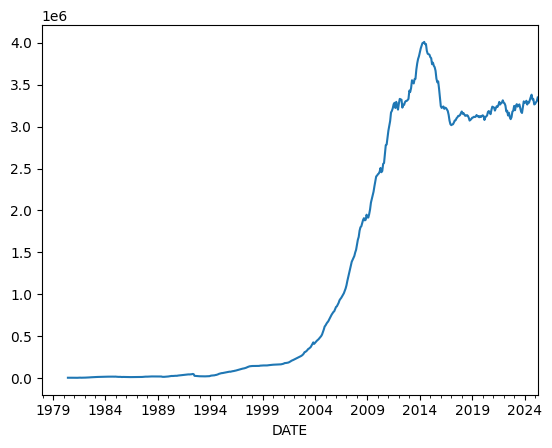

In [47]:
gold_reserves.TRESEGCNM052N.plot.line()

In [48]:
#  CBOE Gold ETF Volatility Index (GVZCLS)
# https://fred.stlouisfed.org/series/GVZCLS
gold_volatility = pdr.DataReader("GVZCLS", "fred", start=start)

<Axes: xlabel='DATE'>

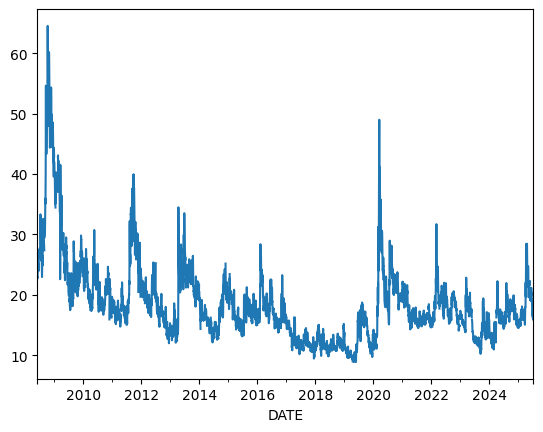

In [49]:
gold_volatility.GVZCLS.plot.line()

In [50]:
#  Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma (DCOILWTICO)
# https://fred.stlouisfed.org/series/DCOILWTICO
oil_wti = pdr.DataReader("DCOILWTICO", "fred", start=start)

<Axes: xlabel='DATE'>

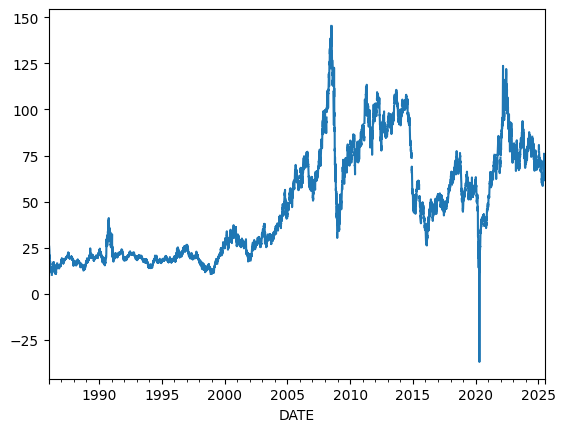

In [51]:
# there is a bug in the data? negative price?
oil_wti.DCOILWTICO.plot.line()

In [52]:
# Crude Oil Prices: Brent - Europe (DCOILBRENTEU)
# https://fred.stlouisfed.org/series/DCOILBRENTEU
oil_brent = pdr.DataReader("DCOILBRENTEU", "fred", start=start)

<Axes: xlabel='DATE'>

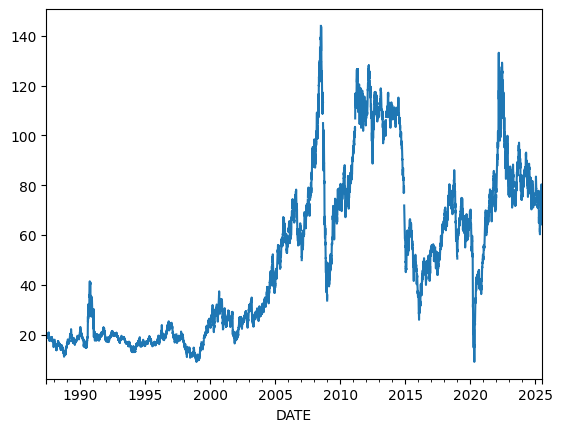

In [53]:
oil_brent.DCOILBRENTEU.plot.line()

In [54]:
# Web Scraping for Macro
# can't call directly via pd.read_html() as it returns 403 (forbidden) --> need to do a bit of work, but still no Selenium
# https://tradingeconomics.com/united-states/indicators
import requests
from bs4 import BeautifulSoup


url = "https://tradingeconomics.com/united-states/indicators"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)

In [55]:

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # You need to be able to find this table tag and read all behind it
    # Find the div with class "table-responsive"
    table_div = soup.find("div", class_="table-responsive")

    # Extract the table within the div
    table = table_div.find("table")

    # Use pandas to read the table into a DataFrame
    df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list

    # Display the DataFrame
    print(df)
else:
    print("Failed to retrieve data from the webpage.")

                  Unnamed: 0     Last  Previous  Highest    Lowest  \
0                   Currency    97.95     97.85   165.00     70.70   
1               Stock Market  6234.00   6260.00  6295.00      4.40   
2            GDP Growth Rate    -0.50      2.40    35.20    -28.10   
3     GDP Annual Growth Rate     2.00      2.50    13.40     -7.50   
4          Unemployment Rate     4.10      4.20    14.90      2.50   
5          Non Farm Payrolls   147.00    144.00  4631.00 -20471.00   
6             Inflation Rate     2.40      2.30    23.70    -15.80   
7         Inflation Rate MoM     0.10      0.20     2.00     -1.80   
8              Interest Rate     4.50      4.50    20.00      0.25   
9           Balance of Trade   -71.52    -60.26     1.95   -138.00   
10           Current Account  -450.00   -312.00     9.96   -450.00   
11    Current Account to GDP    -3.90     -3.30     0.20     -6.00   
12    Government Debt to GDP   124.00    122.00   126.00     31.80   
13         Governmen

/tmp/ipython-input-55-51921383.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list


In [56]:
df

,Unnamed: 0,Last,Previous,Highest,Lowest,Unnamed: 5,Unnamed: 6
0,Currency,97.95,97.85,165.00,70.70,NaN,Jul/25
1,Stock Market,6234.00,6260.00,6295.00,4.40,points,Jul/25
2,GDP Growth Rate,-0.50,2.40,35.20,-28.10,percent,Mar/25
3,GDP Annual Growth Rate,2.00,2.50,13.40,-7.50,percent,Mar/25
4,Unemployment Rate,4.10,4.20,14.90,2.50,percent,Jun/25
5,Non Farm Payrolls,147.00,144.00,4631.00,-20471.00,Thousand,Jun/25
6,Inflation Rate,2.40,2.30,23.70,-15.80,percent,May/25
7,Inflation Rate MoM,0.10,0.20,2.00,-1.80,percent,May/25
8,Interest Rate,4.50,4.50,20.00,0.25,percent,Jun/25
9,Balance of Trade,-71.52,-60.26,1.95,-138.00,USD Billion,May/25


## 2.5) Financial reporting - EDGAR (in Yahoo)

In [57]:
# let's check for NVDA
nvda =  yf.Ticker('NVDA')

In [58]:
# yearly financials for the last 4 years
nvda.financials


,2025-01-31,2024-01-31,2023-01-31,2022-01-31
Tax Effect Of Unusual Items,0.000000e+00,0.000000e+00,-2.841300e+08,0.000000e+00
Tax Rate For Calcs,1.330000e-01,1.200000e-01,2.100000e-01,1.900000e-02
Normalized EBITDA,8.613700e+10,3.558300e+10,7.339000e+09,1.135100e+10
Total Unusual Items,0.000000e+00,0.000000e+00,-1.353000e+09,0.000000e+00
Total Unusual Items Excluding Goodwill,0.000000e+00,0.000000e+00,-1.353000e+09,0.000000e+00
Net Income From Continuing Operation Net Minority Interest,7.288000e+10,2.976000e+10,4.368000e+09,9.752000e+09
Reconciled Depreciation,1.864000e+09,1.508000e+09,1.543000e+09,1.174000e+09
Reconciled Cost Of Revenue,3.263900e+10,1.662100e+10,1.161800e+10,9.439000e+09
EBITDA,8.613700e+10,3.558300e+10,5.986000e+09,1.135100e+10
EBIT,8.427300e+10,3.407500e+10,4.443000e+09,1.017700e+10


In [59]:
# balance sheet
nvda.balance_sheet

,2025-01-31,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Treasury Shares Number,NaN,NaN,NaN,NaN,1.380000e+10
Ordinary Shares Number,2.447700e+10,2.464000e+10,2.466137e+10,2.506000e+10,NaN
Share Issued,2.447700e+10,2.464000e+10,2.466137e+10,2.506000e+10,NaN
Net Debt,NaN,2.429000e+09,7.564000e+09,8.956000e+09,6.116000e+09
Total Debt,1.027000e+10,1.105600e+10,1.203100e+10,1.183100e+10,NaN
...,...,...,...,...,...
Allowance For Doubtful Accounts Receivable,NaN,NaN,NaN,NaN,-2.100000e+07
Gross Accounts Receivable,NaN,NaN,NaN,NaN,2.450000e+09
Cash Cash Equivalents And Short Term Investments,4.321000e+10,2.598400e+10,1.329600e+10,2.120800e+10,NaN
Other Short Term Investments,3.462100e+10,1.870400e+10,9.907000e+09,1.921800e+10,NaN


In [60]:
# Basic info:
nvda.basic_info

AttributeError: 'Ticker' object has no attribute 'basic_info'

In [ ]:
# marketCap is quite useful, but don't know when it was updated? Daily?
nvda.basic_info['marketCap']/1e9

In [ ]:
# read this article for full info: https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html

## 2.6 Web Scraping - company info for clustering

In [ ]:
# ask chatGPT: emulate clicking the link and downloading the content
import requests
from bs4 import BeautifulSoup

# URL of the webpage
url = "https://companiesmarketcap.com/"

# Define headers with a user-agent to mimic a web browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Send a GET request to the URL with headers
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the download link within the webpage
    download_link = soup.find("a", {"rel": "nofollow", "href": "?download=csv"})

    # If the download link is found
    if download_link:
        # Extract the href attribute which contains the actual download link
        download_url = 'https://companiesmarketcap.com/'+download_link["href"]

        # Download the CSV file using the obtained download URL
        download_response = requests.get(download_url, headers=headers)

        # Check if the download request was successful
        if download_response.status_code == 200:
            # Save the content of the response to a local file
            with open("global_stocks.csv", "wb") as f:
                f.write(download_response.content)
            print("CSV file downloaded successfully.")
        else:
            print("Failed to download the CSV file.")
    else:
        print("Download link not found on the webpage.")
else:
    print("Failed to retrieve data from the webpage.")

In [ ]:
global_stocks = pd.read_csv("/content/global_stocks.csv")

In [ ]:
global_stocks['marketcap_b_usd'] = global_stocks.marketcap/1e9

In [ ]:
global_stocks.head(10)

In [ ]:
global_stocks.info()